# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [75]:
!pip install numpy
!pip install pandas
!pip install pycountry_convert
!pip install country_converter

Import the core data science libraries:

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [78]:
# place your code into this Code cell
df = pd.read_csv("data/human-development-index.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

5 random rows are being displayed here

In [81]:
df.sample(n=5)



,Entity,Code,Year,Human Development Index
4832,Serbia,SRB,2001,0.699
6074,Yemen,YEM,1992,0.368
5894,Uruguay,URY,2018,0.815
1677,El Salvador,SLV,1997,0.586
3769,Morocco,MAR,2019,0.684


A list of columns and their datatypes is being displayed in this codeblock

In [82]:
df.dtypes

Entity                      object
Code                        object
Year                         int64
Human Development Index    float64
dtype: object

Shows the number of unique countries/multinational entities in this dataset.

In [83]:
df['Entity'].nunique()

204

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

Dropping all non-country entities from the data set. Non-country entities do not have a country code attached to them.

In [84]:
df = df.dropna(subset=["Code"])
df = df.drop(df[df['Entity'] == 'World'].index)
print(df[df['Code'].isnull()])
df.sample(n=5)

Empty DataFrame
Columns: [Entity, Code, Year, Human Development Index]
Index: []


,Entity,Code,Year,Human Development Index
3233,Lithuania,LTU,2019,0.886
1640,Egypt,EGY,1993,0.587
5772,United Arab Emirates,ARE,1995,0.756
1426,Democratic Republic of Congo,COD,2018,0.474
1435,Denmark,DNK,1994,0.854


Adding a new column to show which continent the country is in.

In [85]:
import country_converter as coco

df['Continent'] = coco.convert(names=df['Entity'], to='continent')
df.sample(n=5)

,Entity,Code,Year,Human Development Index,Continent
1515,Dominican Republic,DOM,1990,0.579,America
3133,Liberia,LBR,2008,0.453,Africa
4340,Peru,PER,1997,0.655,America
2703,Italy,ITA,2006,0.874,Europe
136,Angola,AGO,2013,0.555,Africa


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

Average HDI in the world in the year of 2022

In [86]:
df[df['Year']==2022]['Human Development Index'].mean()

0.723740932642487

Average HDI in Africa in the year of 2022.

In [87]:
df[(df['Year'] == 2022) & (df['Continent'] == 'Africa')]['Human Development Index'].mean()

0.5570370370370371

Average HDI in Europe in the Year of 2022

In [88]:
df[(df['Year'] == 2022) & (df['Continent'] == 'Europe')]['Human Development Index'].mean()

0.8831190476190477

Absolute change in mean HDI from 1990 to 2022 globally

In [89]:
df[df['Year']==2022]['Human Development Index'].mean() - df[df['Year']==1990]['Human Development Index'].mean()

0.12179022841713483

Absolute change in mean HDI from 1990 to 2022 in Africa

In [90]:
df[(df['Year'] == 2022) & (df['Continent'] == 'Africa')]['Human Development Index'].mean() - df[(df['Year'] == 1990) & (df['Continent'] == 'Africa')]['Human Development Index'].mean()

0.12222622622622625

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

Mean HDI by Continent in 2000.

<Axes: title={'center': 'Mean HDI by Continent (2022)'}, xlabel='Continent'>

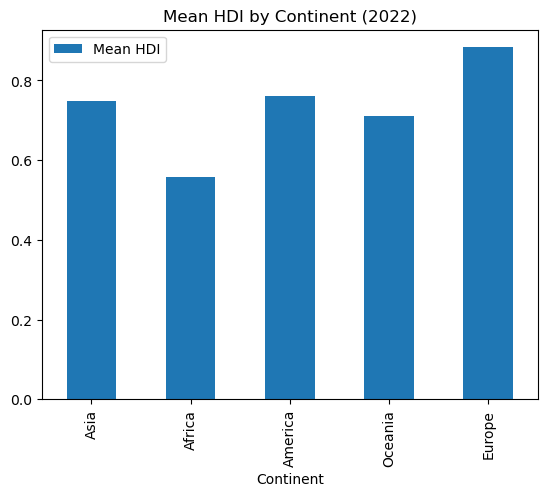

In [91]:
continents = ["Asia", "Africa", "America", "Oceania", "Europe"]
HDI = []
for continent in continents:
    mean_hdi = df[(df['Year'] == 2022) & (df['Continent'] == continent)]['Human Development Index'].mean()
    HDI.append(mean_hdi)

data = {'Continent': continents, 'Mean HDI': HDI}
plot_df = pd.DataFrame(data)

plot_df.plot.bar(x='Continent', y='Mean HDI', title='Mean HDI by Continent (2022)')

HDI Change in Africa from 1990 to 2022

<Axes: title={'center': 'HDI in Africa from 1990 to 2022'}, xlabel='Year'>

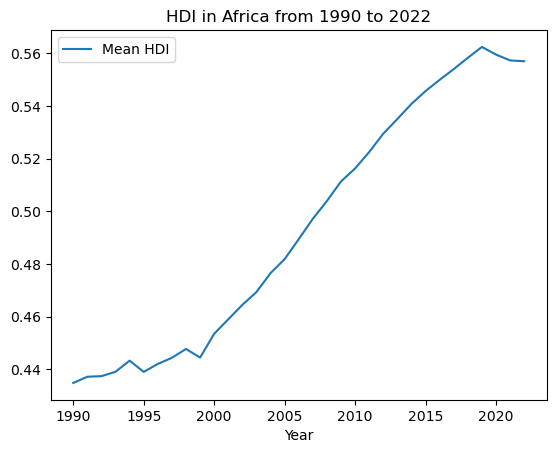

In [92]:
HDI = []

for year in years:
    mean_hdi = df[(df['Year'] == int(year)) & (df['Continent'] == 'Africa')]['Human Development Index'].mean()
    HDI.append(mean_hdi)

data = {'Year': years, 'Mean HDI': HDI}
plot_df = pd.DataFrame(data)

plot_df.plot.line(x='Year', y='Mean HDI', title='HDI in Africa from 1990 to 2022')

Proportion of Countries in Each Group of HDI in Asia in 2022.

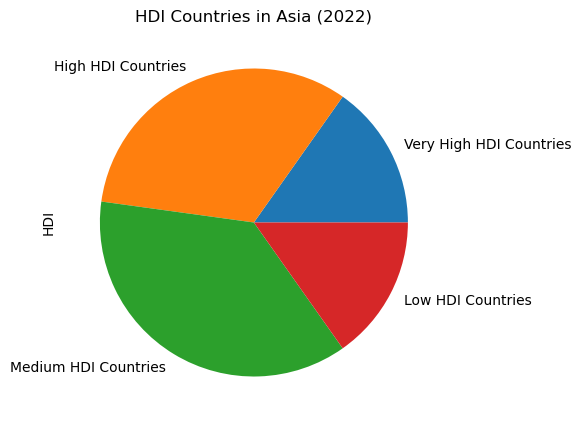

In [93]:
Very_High_HDI = (df[(df['Year'] == 2022) & (df['Continent'] == 'Asia')]['Human Development Index'] > 0.902).sum()
High_HDI = ((df['Year'] == 2022) & (df['Continent'] == 'Asia') & (df['Human Development Index'] > 0.764) & (df['Human Development Index'] < 0.902)).sum()
Low_HDI = ((df['Year'] == 2022) & (df['Continent'] == 'Asia') & (df['Human Development Index'] > 0.517) & (df['Human Development Index'] < 0.64)).sum()
Med_HDI = ((df['Year'] == 2022) & (df['Continent'] == 'Asia') & (df['Human Development Index'] > 0.64) & (df['Human Development Index'] < 0.764)).sum()

pie_chart = pd.DataFrame({'HDI': [Very_High_HDI, High_HDI, Med_HDI, Low_HDI]},index=['Very High HDI Countries', 'High HDI Countries', 'Medium HDI Countries', 'Low HDI Countries'])
plot = pie_chart.plot.pie(y = 'HDI', figsize=(5, 5), title='HDI Countries in Asia (2022)', legend = False)

Proportion of Countries in Each Group of HDI in Oceania in 2022.

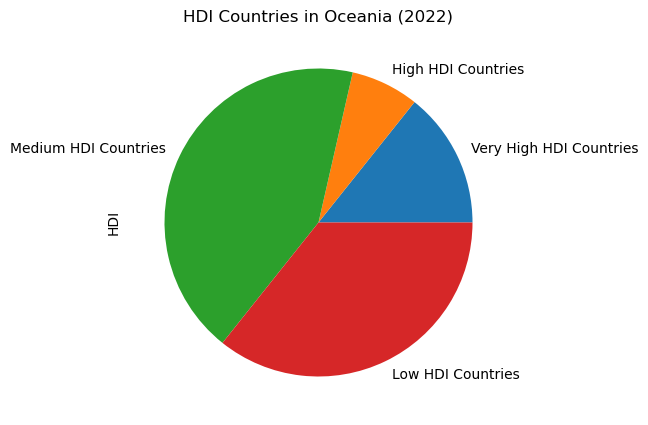

In [94]:
Very_High_HDI = (df[(df['Year'] == 2022) & (df['Continent'] == 'Oceania')]['Human Development Index'] > 0.902).sum()
High_HDI = ((df['Year'] == 2022) & (df['Continent'] == 'Oceania') & (df['Human Development Index'] > 0.764) & (df['Human Development Index'] < 0.902)).sum()
Low_HDI = ((df['Year'] == 2022) & (df['Continent'] == 'Oceania') & (df['Human Development Index'] > 0.517) & (df['Human Development Index'] < 0.64)).sum()
Med_HDI = ((df['Year'] == 2022) & (df['Continent'] == 'Oceania') & (df['Human Development Index'] > 0.64) & (df['Human Development Index'] < 0.764)).sum()

pie_chart = pd.DataFrame({'HDI': [Very_High_HDI, High_HDI, Med_HDI, Low_HDI]},index=['Very High HDI Countries', 'High HDI Countries', 'Medium HDI Countries', 'Low HDI Countries'])
plot = pie_chart.plot.pie(y = 'HDI', figsize=(5, 5), title='HDI Countries in Oceania (2022)', legend = False)

Mean HDI by Continent in 1990.

<Axes: title={'center': 'Mean HDI by Continent (1990)'}, xlabel='Continent'>

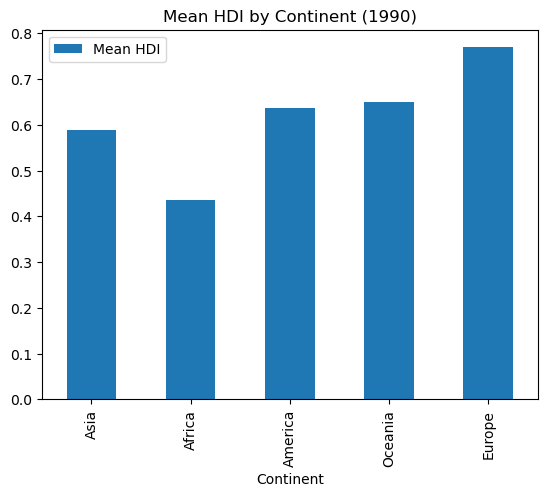

In [95]:
continents = ["Asia", "Africa", "America", "Oceania", "Europe"]
HDI = []
for continent in continents:
    mean_hdi = df[(df['Year'] == 1990) & (df['Continent'] == continent)]['Human Development Index'].mean()
    HDI.append(mean_hdi)

data = {'Continent': continents, 'Mean HDI': HDI}
plot_df = pd.DataFrame(data)

plot_df.plot.bar(x='Continent', y='Mean HDI', title='Mean HDI by Continent (1990)')